In [17]:
from sklearn.metrics import accuracy_score, classification_report
!pip install unrar
!unrar x recordings.rar

^C


'unrar' is not recognized as an internal or external command,
operable program or batch file.


In [14]:
import matplotlib.pyplot as plt

"""
    afiseaza o spectrograma
"""

def plot_spectrogram(frequencies, times, spectrogram) :
  plt.pcolormesh(times, frequencies, spectrogram)
  plt.imshow(spectrogram)
  plt.ylabel('Frequency [Hz]')
  plt.xlabel('Time [sec]')
  plt.show()

In [13]:
from scipy import signal
from scipy.io import wavfile

"""
    returneaza spectrograma unui fisier audio
"""
def get_spectrogram(path) :
  sample_rate, samples = wavfile.read(path)
  frequencies, times, spectrogram = signal.spectrogram(samples, sample_rate)
  return spectrogram

In [12]:
import os
from sklearn.preprocessing import LabelEncoder
"""
    returneaza continutul unui director si etichetele asociate
"""
def get_content(directory) :
  files = os.listdir(directory)
  files.sort()
  tags = []
  for file in files :
    tags.append(file[0])
  tags_encoded = LabelEncoder().fit_transform(tags)
  return files, tags_encoded

In [11]:
import numpy as np
from sklearn.decomposition import PCA

"""
    returneaza numarul optim de componente principale
"""
def optimum_components_count(data):

    pca = PCA()
    pca.fit(data)
    optimum_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= 0.95)
    return optimum_components

In [10]:

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
import numpy as np
from PIL import Image
from matplotlib import cm
from tensorflow.keras.utils import to_categorical

"""
    returneaza datele procesate si liniarizate

"""
def get_processed_data(path, flatten = True) :
    target_width = 128
    target_height = 16

    files, tags = get_content(path)
    data = []
    for file in files :
      spectrogram = get_spectrogram(path + '\\' + file)
      spectrogram = spectrogram

      pil_image = Image.fromarray(np.uint8(spectrogram)).convert('RGB')
      pil_image = pil_image.resize((target_width, target_height))
      data.append(np.array(pil_image))

    data = np.array(data)
    if flatten :
        data = data.reshape(data.shape[0], -1)

    X_train, X_test, y_train, y_test = train_test_split(data, tags, test_size=0.2)

    y_train = to_categorical(y_train, num_classes=10)
    y_test = to_categorical(y_test, num_classes=10)

    return X_train, X_test, y_train, y_test


In [9]:
from sklearn.decomposition import PCA
"""
    reducere dimensionala cu PCA
"""
def apply_pca(X_train, X_test, n_components):

    pca = PCA(n_components=n_components)
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)
    return X_train_pca, X_test_pca

In [7]:
from sklearn.decomposition import PCA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

"""
    creeaza modelul CNN
"""

def create_cnn_model(target_height, new_width, channels = 1):
    model = Sequential()
    model.add(Conv2D(50, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu', input_shape=(target_height, new_width, channels)))
    model.add(Conv2D(75, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(125, kernel_size=(3, 3), strides=(1, 1), padding='same', activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(500, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(10, activation='softmax'))

    model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

    return model

In [6]:
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

"""
    Evaluare model CNN și afișare metrice
"""
def evaluate_model(model, X_test, y_test):

    # Obținerea predicțiilor
    y_pred = model.predict(X_test)
    y_pred_classes = y_pred.argmax(axis=1)
    y_test_classes = y_test.argmax(axis=1)

    # Calcularea metricilor
    acc = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')


    print(f"Acuratețe: {acc:.4f}")
    print(f"Precizie: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

"""
    calculeaza metricile
"""

def calculate_metrics(y_predicted, y_true, num_classes=10):

    if len(y_predicted.shape) > 1 and y_predicted.shape[1] > 1:
        y_pred_classes = y_predicted.argmax(axis=1)
    else:
        y_pred_classes = y_predicted

    if len(y_true.shape) > 1 and y_true.shape[1] > 1:
        y_true_classes = y_true.argmax(axis=1)
    else:
        y_true_classes = y_true

    # Calcularea metricilor
    acc = accuracy_score(y_true_classes, y_pred_classes)
    precision = precision_score(y_true_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_true_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')

    # Afișare metrice
    print(f"Acuratețe: {acc:.4f}")
    print(f"Precizie: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    # Matricea de confuzie
    cm = confusion_matrix(y_true_classes, y_pred_classes)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(num_classes), yticklabels=range(num_classes))
    plt.xlabel('Clase prezise')
    plt.ylabel('Clase reale')
    plt.title('Matricea de confuzie')
    plt.show()


Antrenare model KNN pe datele originale...
Performanță KNN pe datele originale:
Acuratețe: 0.6367
Precizie: 0.6469
Recall: 0.6367
F1-Score: 0.6300


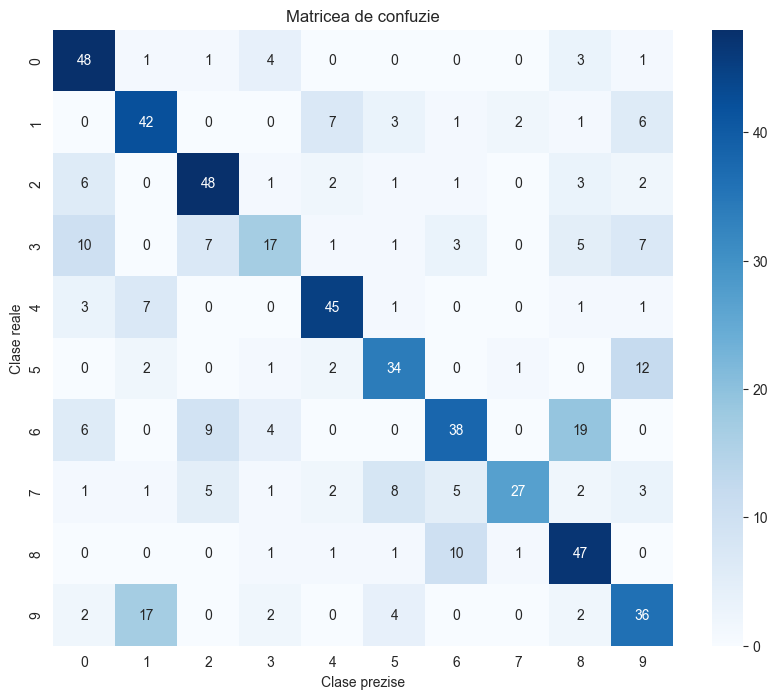

Antrenare model KNN pe datele reduse (PCA)...
Performanță KNN pe datele reduse (PCA):
Acuratețe: 0.6383
Precizie: 0.6519
Recall: 0.6383
F1-Score: 0.6322


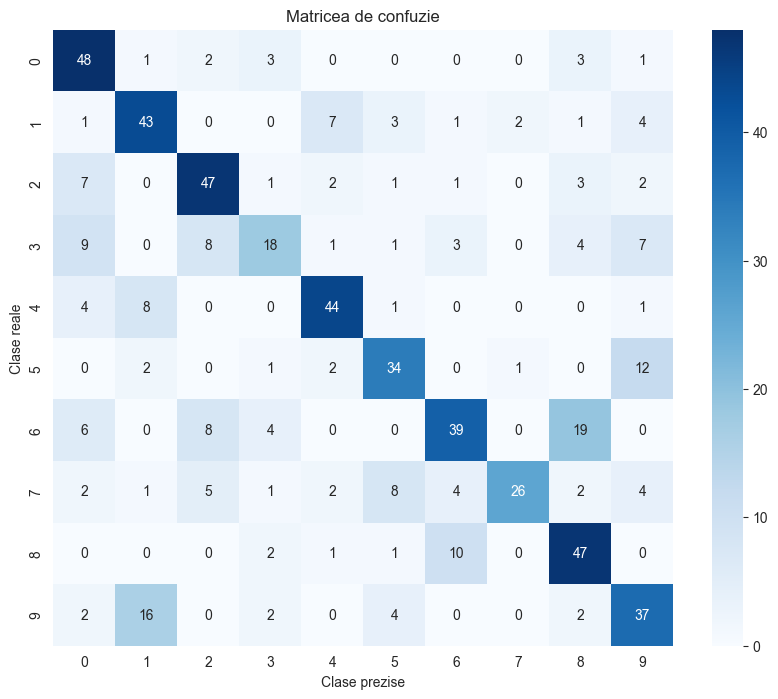

In [19]:
"""
    KNN model
"""
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

directory = 'C:\\Users\\Croii\\Desktop\\Facultate\\Tia\\Colocviu\\recordings'
X_train, X_test, y_train, y_test = get_processed_data(directory)
X_train_pca, X_test_pca = apply_pca(X_train, X_test, 100)

neighbors = 160

print("Antrenare model KNN pe datele originale...")
knn_original = KNeighborsClassifier(n_neighbors=neighbors, metric='euclidean')
knn_original.fit(X_train, y_train.argmax(axis=1))  # Folosim valorile numerice ale etichetelor
y_pred_original = knn_original.predict(X_test)

# Afișăm performanța pe datele originale
print("Performanță KNN pe datele originale:")
calculate_metrics(y_pred_original, y_test, num_classes=10)

###################################################################################################

# KNN pe datele reduse cu PCA
X_train_pca_flattened = X_train_pca
X_test_pca_flattened = X_test_pca


print("Antrenare model KNN pe datele reduse (PCA)...")
knn_pca = KNeighborsClassifier(n_neighbors=neighbors, metric='euclidean')
knn_pca.fit(X_train_pca_flattened, y_train.argmax(axis=1))
y_pred_pca = knn_pca.predict(X_test_pca_flattened)

# Afisam performanta pe datele reduse
print("Performanță KNN pe datele reduse (PCA):")
calculate_metrics(y_pred_pca, y_test, num_classes=10)


In [3]:
from math import isqrt
"""
    Redimensionare date pentru CNN
"""
def reshape_dimensions(components):
    side_length = isqrt(components)
    if side_length * side_length == components:
        return side_length, side_length  # Dacă numarul de componente este patrat perfect, returnam acea valoare
    else:
        # Altfel, cautam divizorii numarului de componente si returnam perechea cea mai apropiata de egalitate
        for i in range(side_length, 0, -1):
            if components % i == 0:
                return i, components // i


Epoch 1/10


C:\Users\Croii\Desktop\Facultate\Tia\Colocviu\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 - 12s - 154ms/step - accuracy: 0.3379 - loss: 4.1950 - val_accuracy: 0.6967 - val_loss: 1.0999
Epoch 2/10
75/75 - 9s - 117ms/step - accuracy: 0.6846 - loss: 0.9424 - val_accuracy: 0.7917 - val_loss: 0.7071
Epoch 3/10
75/75 - 9s - 124ms/step - accuracy: 0.7875 - loss: 0.6531 - val_accuracy: 0.8450 - val_loss: 0.4767
Epoch 4/10
75/75 - 9s - 120ms/step - accuracy: 0.8300 - loss: 0.5159 - val_accuracy: 0.8333 - val_loss: 0.4607
Epoch 5/10
75/75 - 10s - 132ms/step - accuracy: 0.8771 - loss: 0.3997 - val_accuracy: 0.8783 - val_loss: 0.3738
Epoch 6/10
75/75 - 9s - 122ms/step - accuracy: 0.8825 - loss: 0.3493 - val_accuracy: 0.9117 - val_loss: 0.2809
Epoch 7/10
75/75 - 9s - 123ms/step - accuracy: 0.9175 - loss: 0.2447 - val_accuracy: 0.9267 - val_loss: 0.2630
Epoch 8/10
75/75 - 10s - 135ms/step - accuracy: 0.9379 - loss: 0.2058 - val_accuracy: 0.9217 - val_loss: 0.2666
Epoch 9/10
75/75 - 9s - 125ms/step - accuracy: 0.9367 - loss: 0.2039 - val_accuracy: 0.9133 - val_loss: 0.3054
Epoch 10/

C:\Users\Croii\Desktop\Facultate\Tia\Colocviu\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


75/75 - 3s - 38ms/step - accuracy: 0.1196 - loss: 7.2699 - val_accuracy: 0.2167 - val_loss: 2.1764
Epoch 2/30
75/75 - 1s - 10ms/step - accuracy: 0.2008 - loss: 2.1940 - val_accuracy: 0.3483 - val_loss: 1.8871
Epoch 3/30
75/75 - 1s - 9ms/step - accuracy: 0.2871 - loss: 1.9771 - val_accuracy: 0.4783 - val_loss: 1.6299
Epoch 4/30
75/75 - 1s - 9ms/step - accuracy: 0.3625 - loss: 1.7843 - val_accuracy: 0.5500 - val_loss: 1.3390
Epoch 5/30
75/75 - 1s - 10ms/step - accuracy: 0.4400 - loss: 1.5689 - val_accuracy: 0.5967 - val_loss: 1.1923
Epoch 6/30
75/75 - 1s - 10ms/step - accuracy: 0.4971 - loss: 1.4346 - val_accuracy: 0.6933 - val_loss: 1.0357
Epoch 7/30
75/75 - 1s - 9ms/step - accuracy: 0.5571 - loss: 1.2697 - val_accuracy: 0.7067 - val_loss: 0.8929
Epoch 8/30
75/75 - 1s - 9ms/step - accuracy: 0.6175 - loss: 1.1121 - val_accuracy: 0.7350 - val_loss: 0.8195
Epoch 9/30
75/75 - 1s - 10ms/step - accuracy: 0.6233 - loss: 1.0937 - val_accuracy: 0.7717 - val_loss: 0.7399
Epoch 10/30
75/75 - 1s - 

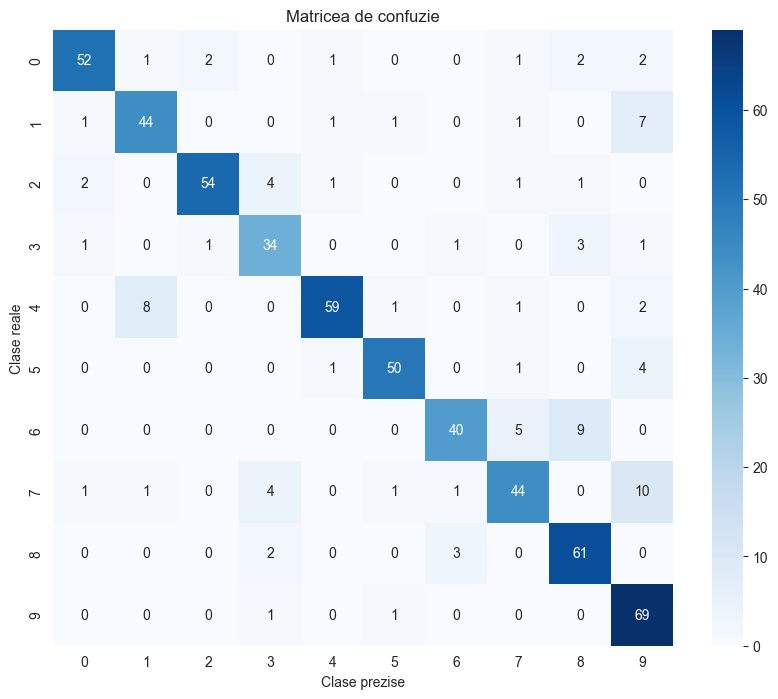

In [16]:
"""
    CNN model
"""
from sklearn.metrics import accuracy_score

directory = 'C:\\Users\\Croii\\Desktop\\Facultate\\Tia\\Colocviu\\recordings'

###################################################################################################
# # Model fara PCA
channels = 3
X_train, X_test, y_train, y_test = get_processed_data(directory, flatten=False)
model_unprocessed = create_cnn_model(X_train.shape[1], X_train.shape[2], channels = channels)
model_unprocessed.fit(X_train, y_train, epochs=10, verbose=2, validation_data=(X_test, y_test))

# Evalueaza modelul
print("Performante CNN fara PCA")
evaluate_model(model_unprocessed, X_test, y_test)

###################################################################################################

# Model cu PCA
X_train, X_test, y_train, y_test = get_processed_data(directory)
channels = 1

# Determinare număr de componente PCA
components = optimum_components_count(X_train)

X_train_pca, X_test_pca = apply_pca(X_train, X_test, components)

# Determinare dimensiuni pentru CNN
height, width = reshape_dimensions(components)

# Redimensionare date pentru CNN
X_train_pca = X_train_pca.reshape(X_train_pca.shape[0], height, width, channels)
X_test_pca = X_test_pca.reshape(X_test_pca.shape[0], height, width, channels)

# Creeaza model CNN si antreneaza
model_pca = create_cnn_model(height, width)
model_pca.fit(X_train_pca, y_train, epochs=30, verbose=2, validation_data=(X_test_pca, y_test))
y_predicted_pca = model_pca.predict(X_test_pca)

# Evalueaza modelul

print("Performante CNN cu PCA")
calculate_metrics(y_predicted_pca, y_test, num_classes=10)
